In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from zipline.data.data_portal import DataPortal
from zipline.data import bundles
from zipline.utils.calendars import get_calendar

In [3]:
bundle_data = bundles.load("quandl")

In [4]:
end_date = pd.Timestamp("2019-01-01", tz="utc")

In [5]:
bundle_data.equity_daily_bar_reader.first_trading_day

Timestamp('1990-01-02 00:00:00+0000', tz='UTC')

In [6]:
data_por = DataPortal(
    asset_finder=bundle_data.asset_finder, 
    trading_calendar=get_calendar("NYSE"),
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_daily_reader=bundle_data.equity_daily_bar_reader
)

In [7]:
TSLA = data_por.asset_finder.lookup_symbol(
    "NVDA",
    as_of_date=None
)

In [8]:
df = data_por.get_history_window(
    assets=[TSLA],
    end_dt=end_date,
    bar_count=365 * 4,
    frequency='1d',
    data_frequency='daily',
    field="close"
)

In [9]:
df.head()

,Equity(2046 [NVDA])
2013-03-19 00:00:00+00:00,12.47
2013-03-20 00:00:00+00:00,12.62
2013-03-21 00:00:00+00:00,12.42
2013-03-22 00:00:00+00:00,12.48
2013-03-25 00:00:00+00:00,12.41


In [10]:
df.describe()

,Equity(2046 [NVDA])
count,1265.000000
mean,61.970448
std,65.898133
min,12.126000
25%,18.545000
50%,23.530000
75%,97.770000
max,250.480000


In [11]:
df = df.dropna()

In [12]:
df.index = pd.DatetimeIndex(df.index)

In [13]:
list(df.columns)[0]

Equity(2046 [NVDA])

In [36]:
df['close'] = df[list(df.columns)[0]]

In [37]:
df.head()

,1d,2d,3d,4d,5d,6d,7d,8d,9d,10d,...,32d,33d,34d,35d,36d,37d,38d,39d,40d,close
2013-03-19 00:00:00+00:00,0.012029,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,...,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,0.012029
2013-03-20 00:00:00+00:00,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,...,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,-0.015848
2013-03-21 00:00:00+00:00,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,...,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,0.004831
2013-03-22 00:00:00+00:00,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,...,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017,-0.005609
2013-03-25 00:00:00+00:00,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,0.016090,...,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017,0.005391,0.007252


In [38]:
df = df.drop(columns=[list(df.columns)[0]])

In [39]:
df.head()

,2d,3d,4d,5d,6d,7d,8d,9d,10d,11d,...,32d,33d,34d,35d,36d,37d,38d,39d,40d,close
2013-03-19 00:00:00+00:00,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,...,0.004345,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,0.012029
2013-03-20 00:00:00+00:00,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,...,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,-0.015848
2013-03-21 00:00:00+00:00,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,...,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,0.004831
2013-03-22 00:00:00+00:00,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,0.016090,...,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017,-0.005609
2013-03-25 00:00:00+00:00,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,0.016090,0.015835,...,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017,0.005391,0.007252


In [40]:
df.tail()

,2d,3d,4d,5d,6d,7d,8d,9d,10d,11d,...,32d,33d,34d,35d,36d,37d,38d,39d,40d,close
2018-01-23 00:00:00+00:00,0.002332,0.029532,0.014466,-0.016731,0.012690,-0.021562,-0.029023,-0.078494,0.048283,0.014274,...,0.017207,0.018057,-0.008208,0.004158,0.002412,0.004572,-0.037847,0.035602,-0.004087,-0.013017
2018-01-24 00:00:00+00:00,0.029532,0.014466,-0.016731,0.012690,-0.021562,-0.029023,-0.078494,0.048283,0.014274,-0.049301,...,0.018057,-0.008208,0.004158,0.002412,0.004572,-0.037847,0.035602,-0.004087,-0.026995,0.002332
2018-01-25 00:00:00+00:00,0.014466,-0.016731,0.012690,-0.021562,-0.029023,-0.078494,0.048283,0.014274,-0.049301,0.061650,...,-0.008208,0.004158,0.002412,0.004572,-0.037847,0.035602,-0.004087,-0.026995,-0.036717,0.029532
2018-01-26 00:00:00+00:00,-0.016731,0.012690,-0.021562,-0.029023,-0.078494,0.048283,0.014274,-0.049301,0.061650,-0.012558,...,0.004158,0.002412,0.004572,-0.037847,0.035602,-0.004087,-0.026995,-0.036717,0.049406,0.014466
2018-01-29 00:00:00+00:00,0.012690,-0.021562,-0.029023,-0.078494,0.048283,0.014274,-0.049301,0.061650,-0.012558,0.020173,...,0.002412,0.004572,-0.037847,0.035602,-0.004087,-0.026995,-0.036717,0.049406,-0.077552,-0.016731


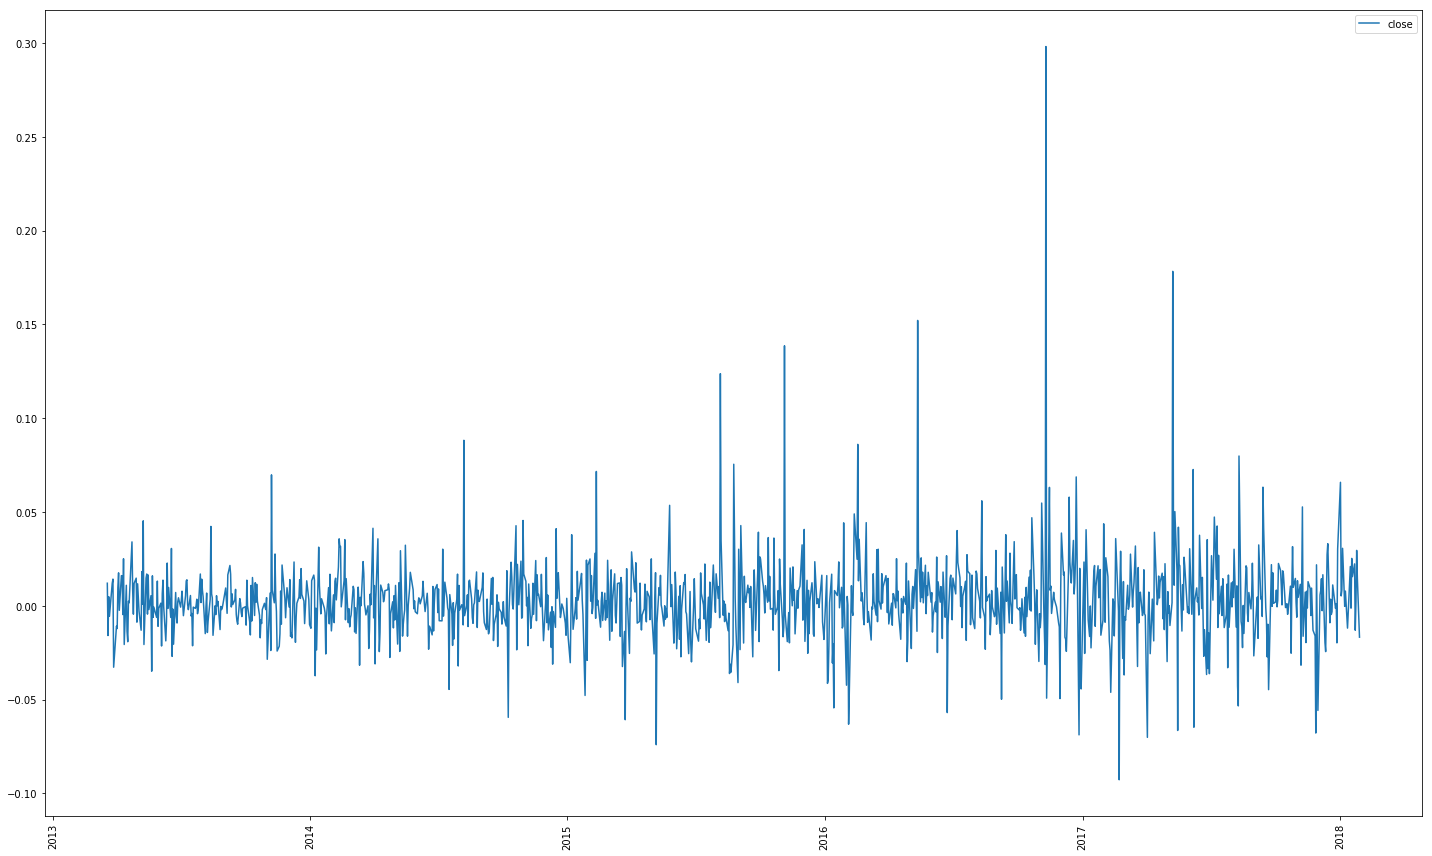

In [41]:
from matplotlib.dates import YearLocator, date2num, DateFormatter

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(20)
fig.set_figheight(12)

ax.plot(df.index, df.close)

lctr = YearLocator()  # every month
frmt = DateFormatter('%Y')  # %b gives us Jan, Feb...

ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)

ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

In [43]:
df['1d'] = df['close'].shift(-1)

In [44]:
df.head()

,2d,3d,4d,5d,6d,7d,8d,9d,10d,11d,...,33d,34d,35d,36d,37d,38d,39d,40d,close,1d
2013-03-19 00:00:00+00:00,-0.015848,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,...,-0.002884,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,0.012029,-0.015848
2013-03-20 00:00:00+00:00,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,...,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,-0.015848,0.004831
2013-03-21 00:00:00+00:00,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,...,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,0.004831,-0.005609
2013-03-22 00:00:00+00:00,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,0.016090,...,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017,-0.005609,0.007252
2013-03-25 00:00:00+00:00,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,0.016090,0.015835,...,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017,0.005391,0.007252,0.012000


In [45]:
for d in range(2, 41):
    col = "%dd" % d
    df[col] = df['close'].shift(-1 * d)
df.head()

,2d,3d,4d,5d,6d,7d,8d,9d,10d,11d,...,33d,34d,35d,36d,37d,38d,39d,40d,close,1d
2013-03-19 00:00:00+00:00,0.004831,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,...,-0.013015,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.012029,-0.015848
2013-03-20 00:00:00+00:00,-0.005609,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,...,0.018242,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.015848,0.004831
2013-03-21 00:00:00+00:00,0.007252,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,0.016090,...,0.000791,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017,0.004831,-0.005609
2013-03-22 00:00:00+00:00,0.012000,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,0.016090,0.015835,...,0.045291,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017,0.005391,-0.005609,0.007252
2013-03-25 00:00:00+00:00,0.014229,-0.032736,-0.010878,-0.012138,0.009814,0.017558,-0.002408,0.016090,0.015835,-0.004677,...,-0.020633,0.014747,0.016955,-0.004423,0.016405,-0.002017,0.005391,-0.034853,0.007252,0.012000


In [46]:
df.tail()

,2d,3d,4d,5d,6d,7d,8d,9d,10d,11d,...,33d,34d,35d,36d,37d,38d,39d,40d,close,1d
2018-01-23 00:00:00+00:00,0.029532,0.014466,-0.016731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013017,0.002332
2018-01-24 00:00:00+00:00,0.014466,-0.016731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002332,0.029532
2018-01-25 00:00:00+00:00,-0.016731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029532,0.014466
2018-01-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014466,-0.016731
2018-01-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.016731,NaN


In [47]:
df = df.dropna()

In [48]:
df.tail()

,2d,3d,4d,5d,6d,7d,8d,9d,10d,11d,...,33d,34d,35d,36d,37d,38d,39d,40d,close,1d
2017-11-22 00:00:00+00:00,-0.016018,-0.067818,0.021841,-0.015096,-0.055747,0.005786,0.008096,0.014425,-0.002604,0.016554,...,-0.005625,-0.011892,0.020944,-0.001246,0.025263,0.015558,0.022337,-0.013017,0.009445,-0.012998
2017-11-24 00:00:00+00:00,-0.067818,0.021841,-0.015096,-0.055747,0.005786,0.008096,0.014425,-0.002604,0.016554,-0.019624,...,-0.011892,0.020944,-0.001246,0.025263,0.015558,0.022337,-0.013017,0.002332,-0.012998,-0.016018
2017-11-27 00:00:00+00:00,0.021841,-0.015096,-0.055747,0.005786,0.008096,0.014425,-0.002604,0.016554,-0.019624,-0.024418,...,0.020944,-0.001246,0.025263,0.015558,0.022337,-0.013017,0.002332,0.029532,-0.016018,-0.067818
2017-11-28 00:00:00+00:00,-0.015096,-0.055747,0.005786,0.008096,0.014425,-0.002604,0.016554,-0.019624,-0.024418,0.001558,...,-0.001246,0.025263,0.015558,0.022337,-0.013017,0.002332,0.029532,0.014466,-0.067818,0.021841
2017-11-29 00:00:00+00:00,-0.055747,0.005786,0.008096,0.014425,-0.002604,0.016554,-0.019624,-0.024418,0.001558,0.027297,...,0.025263,0.015558,0.022337,-0.013017,0.002332,0.029532,0.014466,-0.016731,0.021841,-0.015096


In [49]:
# convert value to change pct
for i in reversed(range(2, 41)):
    col = "%dd" % i
    prv = "%dd" % (i - 1)
    df[col] = (df[col] - df[prv]) / df[prv]
df.head()

/home/qamaruddin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,2d,3d,4d,5d,6d,7d,8d,9d,10d,11d,...,33d,34d,35d,36d,37d,38d,39d,40d,close,1d
2013-03-19 00:00:00+00:00,-1.304831,-2.161058,-2.292967,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,...,3.513015,-2.401575,-0.956615,56.227436,-1.455558,-1.714747,0.149712,-1.260883,0.012029,-0.015848
2013-03-20 00:00:00+00:00,-2.161058,-2.292967,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,...,-2.401575,-0.956615,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-0.015848,0.004831
2013-03-21 00:00:00+00:00,-2.292967,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,-7.682757,...,-0.956615,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.122983,0.004831,-0.005609
2013-03-22 00:00:00+00:00,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,-7.682757,-0.015835,...,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.122983,-3.672058,-0.005609,0.007252
2013-03-25 00:00:00+00:00,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,-7.682757,-0.015835,-1.295323,...,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.122983,-3.672058,-7.465147,0.007252,0.012000


In [50]:
df['1d'] = (df['1d'] - df['close']) / df['close']
df.head()

/home/qamaruddin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,2d,3d,4d,5d,6d,7d,8d,9d,10d,11d,...,33d,34d,35d,36d,37d,38d,39d,40d,close,1d
2013-03-19 00:00:00+00:00,-1.304831,-2.161058,-2.292967,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,...,3.513015,-2.401575,-0.956615,56.227436,-1.455558,-1.714747,0.149712,-1.260883,0.012029,-2.317485
2013-03-20 00:00:00+00:00,-2.161058,-2.292967,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,...,-2.401575,-0.956615,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-0.015848,-1.304831
2013-03-21 00:00:00+00:00,-2.292967,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,-7.682757,...,-0.956615,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.122983,0.004831,-2.161058
2013-03-22 00:00:00+00:00,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,-7.682757,-0.015835,...,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.122983,-3.672058,-0.005609,-2.292967
2013-03-25 00:00:00+00:00,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,-7.682757,-0.015835,-1.295323,...,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.122983,-3.672058,-7.465147,0.007252,0.654667


In [51]:
df = df.drop(columns=['close'])
df.head()

,2d,3d,4d,5d,6d,7d,8d,9d,10d,11d,...,32d,33d,34d,35d,36d,37d,38d,39d,40d,1d
2013-03-19 00:00:00+00:00,-1.304831,-2.161058,-2.292967,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,...,-1.663783,3.513015,-2.401575,-0.956615,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-2.317485
2013-03-20 00:00:00+00:00,-2.161058,-2.292967,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,...,3.513015,-2.401575,-0.956615,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.304831
2013-03-21 00:00:00+00:00,-2.292967,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,-7.682757,...,-2.401575,-0.956615,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.122983,-2.161058
2013-03-22 00:00:00+00:00,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,-7.682757,-0.015835,...,-0.956615,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.122983,-3.672058,-2.292967
2013-03-25 00:00:00+00:00,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,-7.682757,-0.015835,-1.295323,...,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.122983,-3.672058,-7.465147,0.654667


In [52]:
X = df.iloc[:, :32]
y = df.iloc[:, 32:]
X.head()

,2d,3d,4d,5d,6d,7d,8d,9d,10d,11d,...,24d,25d,26d,27d,28d,29d,30d,31d,32d,33d
2013-03-19 00:00:00+00:00,-1.304831,-2.161058,-2.292967,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,...,0.299278,-0.758234,-1.541000,-3.678598,0.235262,-1.591285,-2.345055,-0.629345,-1.663783,3.513015
2013-03-20 00:00:00+00:00,-2.161058,-2.292967,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,...,-0.758234,-1.541000,-3.678598,0.235262,-1.591285,-2.345055,-0.629345,-1.663783,3.513015,-2.401575
2013-03-21 00:00:00+00:00,-2.292967,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,-7.682757,...,-1.541000,-3.678598,0.235262,-1.591285,-2.345055,-0.629345,-1.663783,3.513015,-2.401575,-0.956615
2013-03-22 00:00:00+00:00,0.654667,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,-7.682757,-0.015835,...,-3.678598,0.235262,-1.591285,-2.345055,-0.629345,-1.663783,3.513015,-2.401575,-0.956615,56.227436
2013-03-25 00:00:00+00:00,0.185771,-3.300598,-0.667693,0.115842,-1.808471,0.789165,-1.137127,-7.682757,-0.015835,-1.295323,...,0.235262,-1.591285,-2.345055,-0.629345,-1.663783,3.513015,-2.401575,-0.956615,56.227436,-1.455558


In [53]:
y.head()

,34d,35d,36d,37d,38d,39d,40d,1d
2013-03-19 00:00:00+00:00,-2.401575,-0.956615,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-2.317485
2013-03-20 00:00:00+00:00,-0.956615,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.304831
2013-03-21 00:00:00+00:00,56.227436,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.122983,-2.161058
2013-03-22 00:00:00+00:00,-1.455558,-1.714747,0.149712,-1.260883,-4.708712,-1.122983,-3.672058,-2.292967
2013-03-25 00:00:00+00:00,-1.714747,0.149712,-1.260883,-4.708712,-1.122983,-3.672058,-7.465147,0.654667


Sci-Kit Learn Time Series Split [ <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit">Link</a> ]

In [31]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print("Train Start: %d -> End %d" % (train_index[0], train_index[-1]))
    print("Test Start: %d -> End %d" % (test_index[0], test_index[-1]))
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    print("#" * 50)

Train Start: 0 -> End 204
Test Start: 205 -> End 408
(205, 32) (205, 8)
(204, 32) (204, 8)
##################################################
Train Start: 0 -> End 408
Test Start: 409 -> End 612
(409, 32) (409, 8)
(204, 32) (204, 8)
##################################################
Train Start: 0 -> End 612
Test Start: 613 -> End 816
(613, 32) (613, 8)
(204, 32) (204, 8)
##################################################
Train Start: 0 -> End 816
Test Start: 817 -> End 1020
(817, 32) (817, 8)
(204, 32) (204, 8)
##################################################
Train Start: 0 -> End 1020
Test Start: 1021 -> End 1224
(1021, 32) (1021, 8)
(204, 32) (204, 8)
##################################################


Sci-Kit Learn Gradient Boosting Regressor [<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html">Link</a>]

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(
    loss='ls',
    learning_rate=0.01,
    n_estimators=50,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=32,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=1,
    max_leaf_nodes=None,
    warm_start=False,
    presort='auto',
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001
)

Sci-Kit Learn Multi-Output Regression [<a href="https://scikit-learn.org/stable/modules/multiclass.html#multioutput-regression">Link</a>]

In [33]:
from sklearn.multioutput import MultiOutputRegressor

regressor = MultiOutputRegressor(regressor)

Sci-Kit Learn Cross Validate [<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html">Link</a>]

In [34]:
from sklearn.model_selection import cross_validate

cross_validate(regressor, X, y=y, cv=tscv, scoring='neg_mean_squared_error')

      Iter       Train Loss   Remaining Time 
         1           0.0002            0.27s
         2           0.0002            0.25s
         3           0.0002            0.22s
         4           0.0002            0.21s
         5           0.0002            0.20s
         6           0.0002            0.19s
         7           0.0002            0.19s
         8           0.0002            0.18s
         9           0.0002            0.17s
        10           0.0002            0.17s
        20           0.0001            0.12s
        30           0.0001            0.08s
        40           0.0001            0.04s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.19s
         2           0.0002            0.19s
         3           0.0002            0.19s
         4           0.0002            0.18s
         5           0.0002            0.18s
         6           0.0002            0.18s
        

        20           0.0002            0.34s
        30           0.0001            0.22s
        40           0.0001            0.11s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.56s
         2           0.0002            0.55s
         3           0.0002            0.54s
         4           0.0002            0.52s
         5           0.0002            0.51s
         6           0.0002            0.50s
         7           0.0002            0.49s
         8           0.0002            0.48s
         9           0.0002            0.47s
        10           0.0002            0.46s
        20           0.0001            0.34s
        30           0.0001            0.23s
        40           0.0001            0.11s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0002            0.57s
         2           0.0002            0.55s
        

        40           0.0002            0.34s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            1.70s
         2           0.0003            1.66s
         3           0.0003            1.63s
         4           0.0003            1.60s
         5           0.0003            1.56s
         6           0.0003            1.53s
         7           0.0003            1.49s
         8           0.0003            1.46s
         9           0.0003            1.42s
        10           0.0003            1.39s
        20           0.0002            1.04s
        30           0.0002            0.69s
        40           0.0002            0.34s
        50           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0004            1.71s
         2           0.0003            1.68s
         3           0.0003            1.64s
         4           0.0003            1.60s
        

KeyboardInterrupt: 

Sci-Kit Learn Cross Validation Score [<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score">Link</a>]

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(regressor, X, y=y, cv=tscv)

In [ ]:
def plotme(y_test, y_predicted, col, step):
    fig, ax = plt.subplots()

    fig.subplots_adjust(bottom=0.3)

    fig.set_figwidth(16)
    fig.set_figheight(8)

    ax.plot(y_test.index, y_test[col], 'ro')
    ax.plot(y_test.index, y_predicted[:,step], 'bo')

    ax.legend()

    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.show();

Sci-Kit Learn Cross Validation Predict [<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html">Link</a>]

In [ ]:
from sklearn.model_selection import cross_val_predict

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    y_predicted = cross_val_predict(regressor, X_test, y=y_test)
    plotme(y_test, y_predicted, '33d', 0)

In [ ]:
from sklearn.model_selection import cross_val_predict

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    y_predicted = cross_val_predict(regressor, X_test, y=y_test)
    plotme(y_test, y_predicted, '40d', 7)

In [54]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=plt.cm.coolwarm,
                   vmin=-.2, vmax=1.2)

    # Formatting
    ax.set(yticks=np.arange(n_splits),
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits, -.2]) #, xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

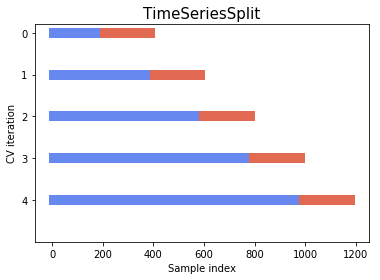

In [55]:
fig, ax = plt.subplots()

plot_cv_indices(tscv, X, y, ax, 5)

In [90]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        waste = 32
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            print(start, mid, stop)
            yield indices[start: mid], indices[mid + waste: stop]

In [91]:
btscv = BlockingTimeSeriesSplit(5)
for ii, (tr, tt) in enumerate(btscv.split(X)):
    print(ii, tr[0], tr[-1], tt[0], tt[-1])

0 189 237
0 0 188 221 236
237 426 474
1 237 425 458 473
474 663 711
2 474 662 695 710
711 900 948
3 711 899 932 947
948 1137 1185
4 948 1136 1169 1184


0 189 237
237 426 474
474 663 711
711 900 948
948 1137 1185


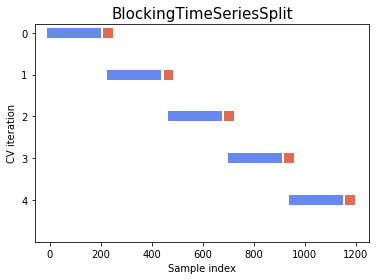

In [92]:
fig, ax = plt.subplots()

plot_cv_indices(btscv, X, y, ax, 5)